In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

 52% 9.00M/17.3M [00:00<00:00, 80.6MB/s]
100% 17.3M/17.3M [00:00<00:00, 128MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/skin-disease-dataset.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import os
path='/content/skin-disease-datasaet/train_set'
count=0
names=[]
total_images=0
for i in os.listdir(path):
  count+=1
  names.append(i)
  images_path=os.listdir(path+'/'+i)
  print('num of images'+i+":",+len(images_path),'||',end=' ')
  total_images+=len(images_path)

print('Total number of images we have:',total_images)

num of imagesVI-chickenpox: 136 || num of imagesBA-impetigo: 80 || num of imagesVI-shingles: 130 || num of imagesPA-cutaneous-larva-migrans: 100 || num of imagesFU-nail-fungus: 129 || num of imagesFU-athlete-foot: 124 || num of imagesFU-ringworm: 90 || num of imagesBA- cellulitis: 136 || Total number of images we have: 925


In [12]:
print(names)

['VI-chickenpox', 'BA-impetigo', 'VI-shingles', 'PA-cutaneous-larva-migrans', 'FU-nail-fungus', 'FU-athlete-foot', 'FU-ringworm', 'BA- cellulitis']


In [13]:
print(len(names))

8


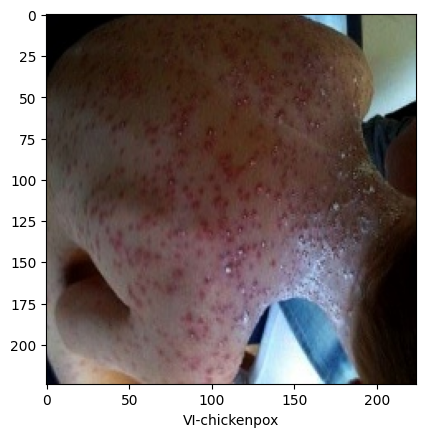

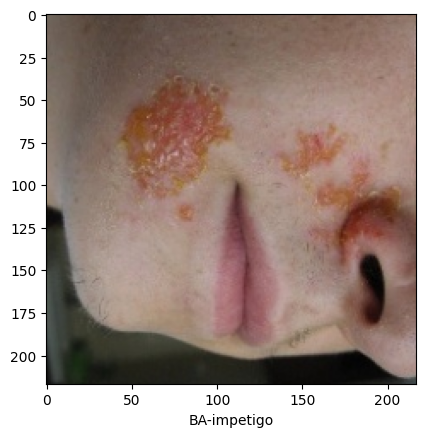

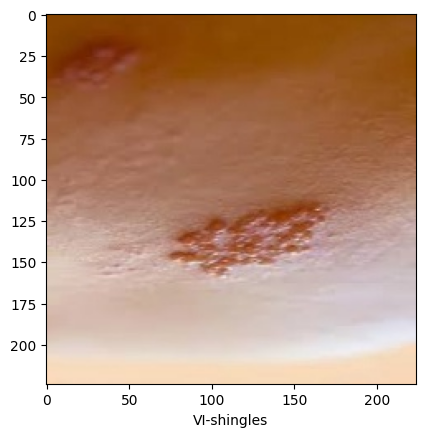

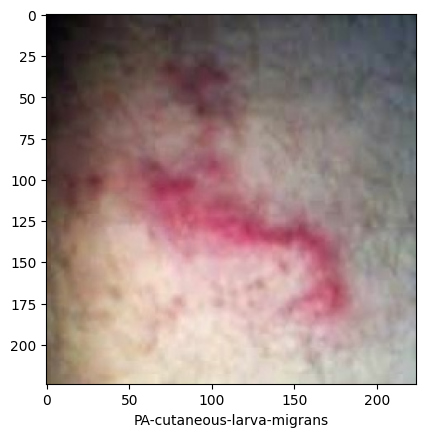

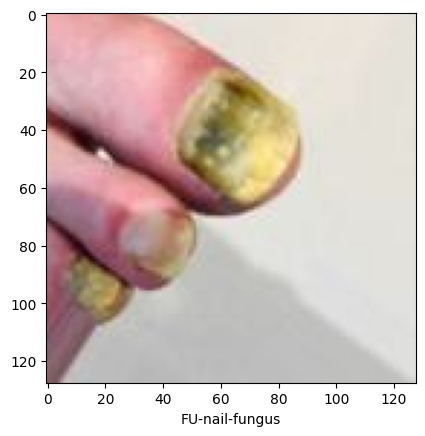

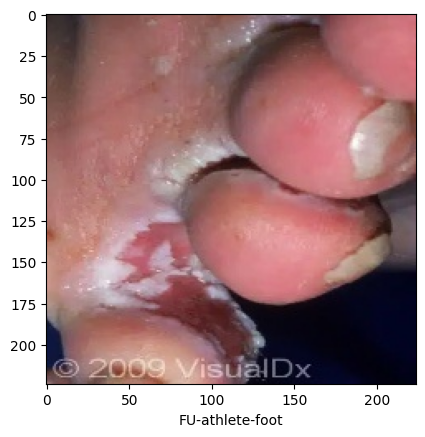

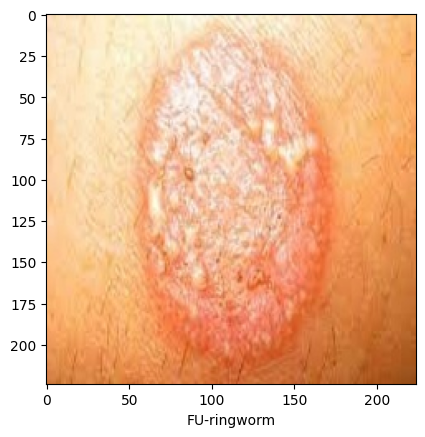

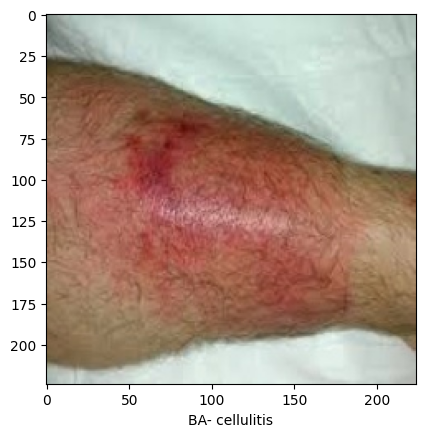

In [14]:
mage_show)
            plt.xlabel(plant_name)
            plt.show()
import os
import matplotlib.pyplot as plt

# Define the directory where your images are located
images_dir = '/content/skin-disease-datasaet/train_set'

# Get a list of subdirectories (disease names)
plant_names = os.listdir(images_dir)

# Iterate through the subdirectories (disease names) and display the first image in each directory
for plant_name in plant_names:
    disease_dir = os.path.join(images_dir, plant_name)

    if os.path.isdir(disease_dir):
        image_files = [f for f in os.listdir(disease_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if image_files:
            image_path = os.path.join(disease_dir, image_files[0])  # Display the first image in each folder
            image_show = plt.imread(image_path)

            plt.figure()
            plt.imshow(i

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [58]:
base_model=ResNet50(include_top=False,weights='imagenet',input_shape=(223,223,3),classes=8)

In [59]:
base_model.trainable=False

In [60]:
pt=Input(shape=(223,223,3))
func=tf.cast(pt,tf.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model=base_model(x,training=False)
model=GlobalAveragePooling2D()(model)
model=Dense(128,activation='relu')(model)
model=Dense(64,activation='relu')(model)
model=Dense(8,activation='softmax')(model)
model_main=Model(inputs=pt,outputs=model)

In [61]:
model_main.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 223, 223, 3)]     0         
                                                                 
 tf.cast_2 (TFOpLambda)      (None, 223, 223, 3)       0         
                                                                 
 tf.__operators__.getitem_2  (None, 223, 223, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 223, 223, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0   

In [62]:
train_datagen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)
path_train='/content/skin-disease-datasaet/train_set'


In [63]:
print("Class labels from your dataset:")
for idx, label in enumerate(names):
    print(f"{idx}: {label}")

# Print class labels from your model
print("Class labels from your model:")
print(model_main.summary())

Class labels from your dataset:
0: VI-chickenpox
1: BA-impetigo
2: VI-shingles
3: PA-cutaneous-larva-migrans
4: FU-nail-fungus
5: FU-athlete-foot
6: FU-ringworm
7: BA- cellulitis
Class labels from your model:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 223, 223, 3)]     0         
                                                                 
 tf.cast_2 (TFOpLambda)      (None, 223, 223, 3)       0         
                                                                 
 tf.__operators__.getitem_2  (None, 223, 223, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 223, 223, 3)       0         
 da)                                                             
                                                

In [64]:
train=train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical',seed=42)

Found 924 images belonging to 8 classes.


In [65]:
#CallBacks
es=EarlyStopping(monitor='accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='accuracy',verbose=1,patience=5,min_lr=0.001)

In [66]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
model_main.fit(train,steps_per_epoch=50,epochs=30,verbose=1,callbacks=[es,mc,lr])

Epoch 1/30
29/50 [================>.............] - ETA: 8s - loss: 0.0237 - accuracy: 0.9957

50/50 [==============================] - 12s 235ms/step - loss: 0.0237 - accuracy: 0.9957 - lr: 0.0010


In [100]:

test_path='/content/skin-disease-datasaet/test_set'


test_datagen=ImageDataGenerator()
test=test_datagen.flow_from_directory(directory=test_path,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical',seed=42)

Found 233 images belonging to 8 classes.


In [101]:
model_main.evaluate(test)

8/8 [==============================] - 2s 98ms/step - loss: 0.1499 - accuracy: 0.9528


[0.1498790830373764, 0.9527897238731384]

In [103]:
model_main.save("Disease_predicition.h5")

In [131]:
from keras.preprocessing import image
import numpy as np
img_path='/content/skin-disease-datasaet/test_set/BA-impetigo/18_BA-impetigo (82).jpg'
img=image.load_img(image_path,target_size=(223,223,3))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=img/255.0


In [132]:
prediction=model_main.predict(img)

1/1 [==============================] - 0s 56ms/step


In [133]:
print(prediction)

[[2.7230239e-02 5.9107679e-04 8.7011198e-04 1.1327812e-02 3.5605665e-02
  9.2374665e-01 6.3589243e-05 5.6474149e-04]]


In [134]:
predicted_class_index = np.argmax(prediction)

In [135]:
predicted_class = list(train.class_indices.keys())[predicted_class_index]

In [136]:
predicted_class

'PA-cutaneous-larva-migrans'

In [137]:
print(f"Predicted Disease: {predicted_class}")
print(f"Confidence Score: {prediction[0][predicted_class_index]}")

Predicted Disease: PA-cutaneous-larva-migrans
Confidence Score: 0.923746645450592


In [141]:
train.class_indices

{'BA- cellulitis': 0,
 'BA-impetigo': 1,
 'FU-athlete-foot': 2,
 'FU-nail-fungus': 3,
 'FU-ringworm': 4,
 'PA-cutaneous-larva-migrans': 5,
 'VI-chickenpox': 6,
 'VI-shingles': 7}

In [140]:
# Make predictions on a test image
from keras.preprocessing import image
import numpy as np

image_path = '/content/skin-disease-datasaet/test_set/FU-nail-fungus/_11_8230.jpg'
img = image.load_img(image_path, target_size=(223, 223, 3))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)  # Ensure the same preprocessing as during training
prediction = model_main.predict(img)
predicted_class_index = np.argmax(prediction)
predicted_class = list(train.class_indices.keys())[predicted_class_index]


print(f"Predicted Disease: {predicted_class}")

1/1 [==============================] - 0s 83ms/step
Predicted Disease: FU-nail-fungus


In [142]:
predicted_class_index

3